In [1]:
import pandas as pd
import numpy as np

# Load Data
data18 = pd.read_csv('2018.csv')
data19 = pd.read_csv('2019.csv')
data20 = pd.read_csv('2020.csv')

data18.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2018
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2018
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,6/23/2018
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,5/11/2018
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,5/29/2018


## Data Preprocessing

In [2]:
# Remove leading spaces from column names
data20.columns = data20.columns.str.strip()

# concatenate the data from the three years into one dataframe
hotel_data = pd.concat([data18, data19, data20])

In [3]:
hotel_data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
12339,City Hotel,1,7,2019,August,35,22,1,1,2,...,No Deposit,9.0,NaN,0,Transient,140.00,0,1,Canceled,8/16/2019
11938,City Hotel,1,128,2020,June,24,12,1,2,1,...,No Deposit,9.0,NaN,0,Transient,135.00,0,0,Canceled,2/8/2020
27538,Resort Hotel,0,230,2019,July,28,4,2,5,2,...,No Deposit,240.0,NaN,0,Transient,101.47,0,1,Check-Out,7/11/2019
11385,City Hotel,1,182,2019,July,31,26,0,4,2,...,No Deposit,14.0,NaN,0,Transient-Party,85.25,0,0,Canceled,5/9/2019
671,Resort Hotel,1,125,2020,March,10,9,2,4,2,...,No Deposit,240.0,NaN,0,Transient,42.00,0,2,Canceled,1/1/2020


In [4]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141947 entries, 0 to 40686
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141947 non-null  object 
 1   is_canceled                     141947 non-null  int64  
 2   lead_time                       141947 non-null  int64  
 3   arrival_date_year               141947 non-null  int64  
 4   arrival_date_month              141947 non-null  object 
 5   arrival_date_week_number        141947 non-null  int64  
 6   arrival_date_day_of_month       141947 non-null  int64  
 7   stays_in_weekend_nights         141947 non-null  int64  
 8   stays_in_week_nights            141947 non-null  int64  
 9   adults                          141947 non-null  int64  
 10  children                        141939 non-null  float64
 11  babies                          141947 non-null  int64  
 12  meal                  

In [5]:
# Handling Missing Values
for i in hotel_data.columns:
    if hotel_data[i].isna().sum() != 0:
        print('Null values in', i, 'column :', hotel_data[i].isna().sum())

Null values in children column : 8
Null values in country column : 625
Null values in agent column : 19555
Null values in company column : 133822


In [6]:
hotel_data = hotel_data.dropna(subset=['children'])

In [7]:
mode_country = hotel_data['country'].mode()[0]
hotel_data['country'].fillna(mode_country, inplace=True)

In [8]:
hotel_data = hotel_data.drop(columns=['company'])
hotel_data['agent'].fillna(9, inplace=True)

In [9]:
hotel_data.isna().sum().sum()

0

In [10]:
market_segment_data = pd.read_csv('market_segment.csv')
meal_cost_data = pd.read_csv('meal_cost.csv')

In [11]:
market_segment_data.head()

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation


In [12]:
meal_cost_data.head()

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [13]:
# more Formatting
meal_cost_data['Cost'] = meal_cost_data['Cost'].astype(str).str.strip()

# Remove white spaces and convert to the same data type
hotel_data['market_segment'] = hotel_data['market_segment'].str.strip()
meal_cost_data['meal'] = meal_cost_data['meal'].str.strip()
meal_cost_data['Cost'] = meal_cost_data['Cost'].str.strip()

# Cost column should be numeric
meal_cost_data['Cost'] = pd.to_numeric(meal_cost_data['Cost'], errors='coerce')

# Merge the dataframes
hotel_data = pd.merge(hotel_data, market_segment_data, on='market_segment', how='left')
hotel_data = pd.merge(hotel_data, meal_cost_data, on='meal', how='left')

In [14]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,5/6/2018,0.3,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,0,Transient,105.5,0,0,Canceled,4/22/2018,0.3,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,0,Transient,123.0,0,0,Canceled,6/23/2018,0.3,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,0,Transient,107.0,0,2,Canceled,5/11/2018,0.3,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,9.0,0,Transient,108.3,0,2,Canceled,5/29/2018,0.1,12.99


In [15]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141939 entries, 0 to 141938
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141939 non-null  object 
 1   is_canceled                     141939 non-null  int64  
 2   lead_time                       141939 non-null  int64  
 3   arrival_date_year               141939 non-null  int64  
 4   arrival_date_month              141939 non-null  object 
 5   arrival_date_week_number        141939 non-null  int64  
 6   arrival_date_day_of_month       141939 non-null  int64  
 7   stays_in_weekend_nights         141939 non-null  int64  
 8   stays_in_week_nights            141939 non-null  int64  
 9   adults                          141939 non-null  int64  
 10  children                        141939 non-null  float64
 11  babies                          141939 non-null  int64  
 12  meal            

In [16]:
# Handling Dicrepancies in data
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
discrepancies = hotel_data[hotel_data['reservation_status_date'].dt.year != hotel_data['arrival_date_year']]
discrepancies

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
566,Resort Hotel,1,297,2018,September,36,3,1,3,2,...,240.0,0,Transient,0.00,0,0,Canceled,2014-11-18,0.1,12.99
4211,City Hotel,1,265,2018,July,28,9,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4212,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4213,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4214,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116412,City Hotel,1,301,2020,August,34,24,1,3,2,...,9.0,0,Transient,116.10,0,2,Canceled,2019-12-02,0.3,12.99
116518,City Hotel,1,279,2020,August,35,28,1,1,2,...,9.0,0,Transient,107.10,0,0,Canceled,2019-12-29,0.3,12.99
116533,City Hotel,1,321,2020,August,35,28,1,4,2,...,9.0,0,Transient,145.08,0,3,Canceled,2019-12-24,0.3,17.99
116613,City Hotel,1,52,2020,January,1,6,2,2,2,...,9.0,0,Transient,88.40,0,2,Canceled,2019-12-22,0.3,12.99


In [17]:
expected_years = [2018, 2019, 2020]

# filter rows with abnormal discrepancies and keep those woth expected years
hotel_data = hotel_data[hotel_data['reservation_status_date'].dt.year.isin(expected_years)]

In [18]:
hotel_data.duplicated().sum()

40883

In [19]:
# Drop duplicates
hotel_data = hotel_data.drop_duplicates()
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,2018-05-06,0.3,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,0,Transient,105.5,0,0,Canceled,2018-04-22,0.3,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,0,Transient,123.0,0,0,Canceled,2018-06-23,0.3,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,0,Transient,107.0,0,2,Canceled,2018-05-11,0.3,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,9.0,0,Transient,108.3,0,2,Canceled,2018-05-29,0.1,12.99


## Exploratory Data Analysis

### i) Monthly Trend of Cancellation Rate

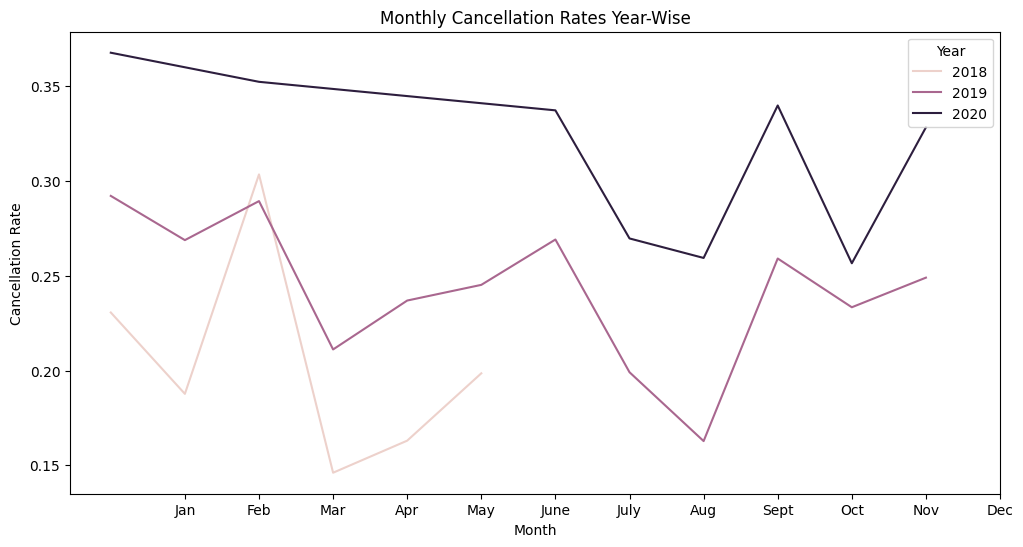

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by year and month and calculate the monthly cancellation rates
monthly_cancellation_rates = hotel_data.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# Sort data by year and month for proper plotting
monthly_cancellation_rates = monthly_cancellation_rates.sort_values(by=['arrival_date_year', 'arrival_date_month'])

# A time series plot for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancellation_rates, x='arrival_date_month', y='is_canceled', hue='arrival_date_year')
plt.title('Monthly Cancellation Rates Year-Wise')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

December, January and February exhibit the highest cancellation rates.

### ii) Average Lead Time for Each Reservation Status

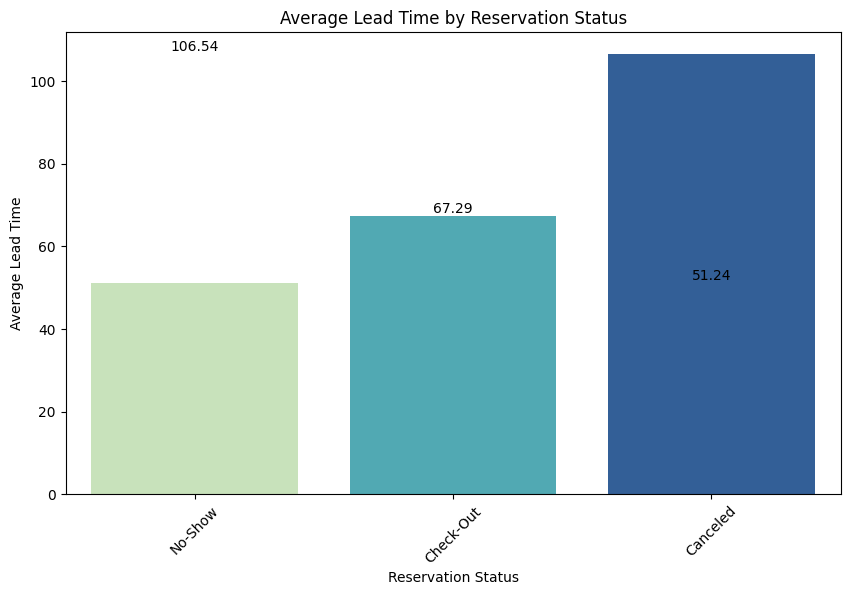

In [21]:
# Group the data researvation status and calculate the average lead time
reservation_lead_time = hotel_data.groupby('reservation_status')['lead_time'].mean().reset_index()

# Sort the data for plotting
reservation_lead_time = reservation_lead_time.sort_values(by='lead_time')

# Create a bar plot with labels
plt.figure(figsize=(10, 6))
sns.barplot(data=reservation_lead_time, x='reservation_status', y='lead_time', palette='YlGnBu')
plt.title('Average Lead Time by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Average Lead Time')

# Add data to the bars
for index, row in reservation_lead_time.iterrows():
    plt.text(index, row['lead_time'], f'{row["lead_time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

The average lead time for canceled reservations is found to be roughly 106 days, while the average lead time for “No-Show” reservations is approximately 51 days and the average lead time for “Check-Out” reservations is approximately 68 days. We can understand that there is a higher chances of cancellations as the lead time (i.e., the time between booking and the check-in date) grows from the graph chart above. This can be the result of unanticipated events in the visitors’ lives, making them put other obligations ahead of their hotel stay.

### iii) Cancellation Rate by Market Segment

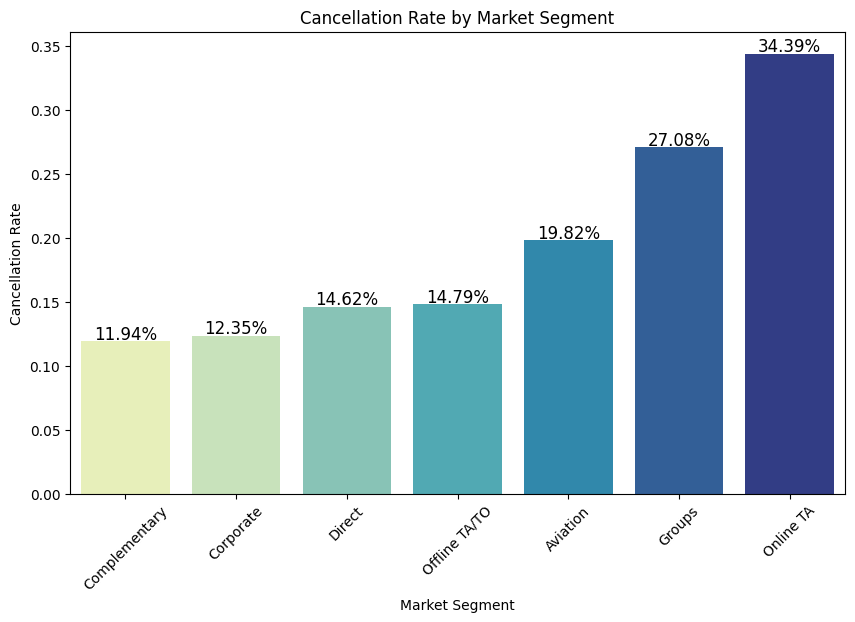

In [22]:
# Group data by market segement and calculate cancellation Rates
market_segment_cancellation_rate = hotel_data.groupby('market_segment')['is_canceled'].mean().reset_index()

# Sirt data for plotting
market_segment_cancellation_rate = market_segment_cancellation_rate.sort_values(by='is_canceled')

# Create a bar plot for market segment cancellation rates
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=market_segment_cancellation_rate, x='market_segment', y='is_canceled', palette='YlGnBu')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')

plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

Among the different market segments, it’s striking that Online Travel Agencies and Group bookings have the highest cancellation rates. In contrast, Complementary bookings exhibit the lowest cancellation rate, which is expected as these are typically free. This highlights the influence of booking channel on cancellation rates, with more flexible options having lower cancellations.

### iv) Cancellation Rate by Distribution Channel

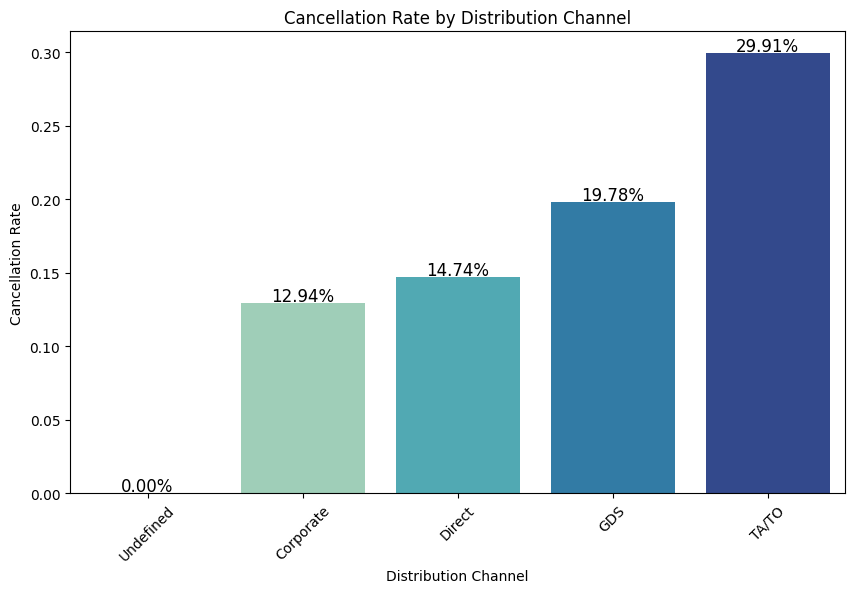

In [23]:
# Group the data by distribution channel and calculate the cancellation rate
distribution_channel_cancellation_rate = hotel_data.groupby('distribution_channel')['is_canceled'].mean().reset_index()

# Sort the data for plotting
distribution_channel_cancellation_rate = distribution_channel_cancellation_rate.sort_values(by='is_canceled')

# Create a bar plot for distribution channel cancellation rates
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=distribution_channel_cancellation_rate, x='distribution_channel', y='is_canceled', palette='YlGnBu')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

The above bar chart reveals a noteworthy trend in cancellation rates across various distribution channels. Online travel agencies exhibit the highest cancellation rate at 30%, closely followed by global distribution systems at 20%. In stark contrast, corporate bookings display the lowest cancellation rate, standing at a mere 12%. This underscores the significant impact of the distribution channel on cancellation rates, with more flexible options consistently leading to lower cancellation percentages.

### v) Checking guests who make special requests whether they are more or less likely to cancel

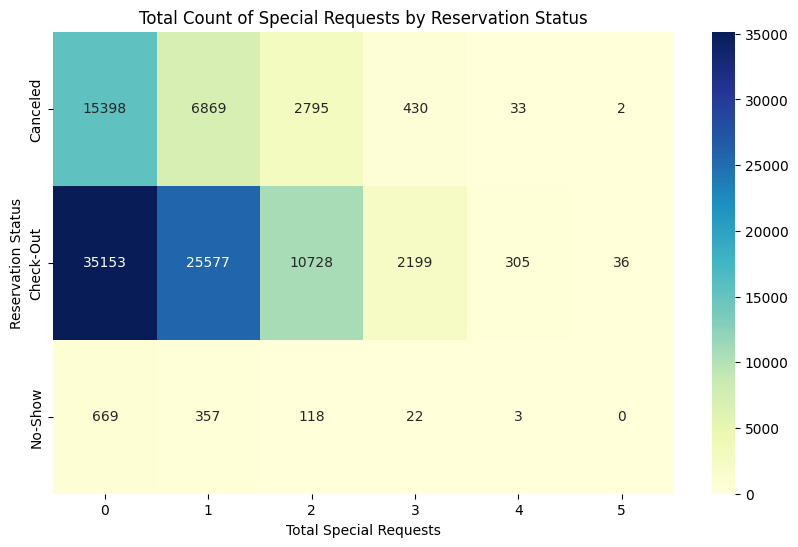

In [24]:
# Pivot table with 'reservation_status' and 'total_of_special_requests' as indices
pivot_table = hotel_data.pivot_table(index='reservation_status', columns='total_of_special_requests', aggfunc='size', fill_value=0)

# Heatmap using a color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Total Count of Special Requests by Reservation Status')
plt.xlabel('Total Special Requests')
plt.ylabel('Reservation Status')
plt.show()

Analyzing whether special requests impact cancellations, it’s apparent that guests who make special requests tend to predominantly complete their stays (‘Check-Out’). Interestingly, the highest cancellation rate is observed among bookings with no special requests, similar to ‘Check-Out’ bookings. This indicates that having special requests doesn’t significantly affect cancellation behavior.

### vi) Checking whether guests who required parking were more likely to cancel

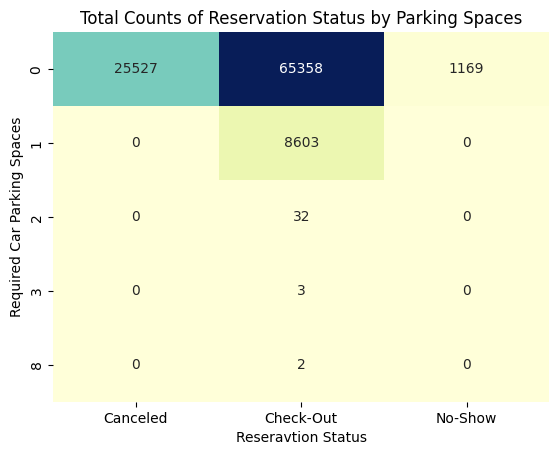

In [25]:
pivot_table = hotel_data.pivot_table(index='required_car_parking_spaces', columns='reservation_status', values='adr', aggfunc='count', fill_value=0)

# Create a heatmap with a color scheme
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

plt.title('Total Counts of Reservation Status by Parking Spaces')
plt.xlabel('Reseravtion Status')
plt.ylabel('Required Car Parking Spaces')

plt.show()

The need for parking space appears to have minimal impact on cancellations, as guests who do not request car parking space still exhibit various cancellation rates. This suggests that the availability of parking doesn’t notably influence booking cancellations.

### vi) Are Certain Customer Types More Prone to Cancellations

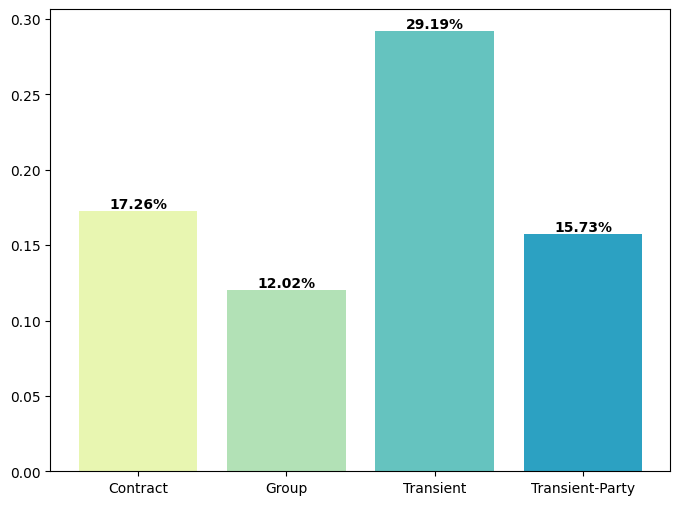

In [26]:
# Group the data by customer type and calculate cancellation rates
customer_type_cancellation = hotel_data.groupby('customer_type')['is_canceled'].mean().reset_index()

# Create a bar plot with data labels
plt.figure(figsize=(8, 6))
bars = plt.bar(customer_type_cancellation['customer_type'], customer_type_cancellation['is_canceled'], color=sns.color_palette('YlGnBu'))

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
# Show the plot
plt.show()

A study of different consumer groups shows that reservations for transient parties had a 15% cancellation rate, while reservations for transients had a 29% cancellation rate. These results imply that some consumer categories, such short-term visitors, can be more susceptible to causes of cancellations.

### vii) Investigating if Guests are More Likely to Camcel if they don't Get the Room Type They Reserved

Text(0.5, 1.0, 'Distribution of Reservation Status\n(Room Type Changes)')

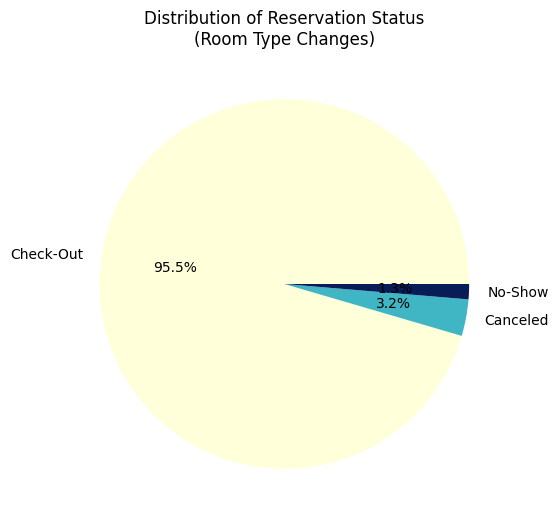

In [27]:
# Filter rows where 'reserved_room_type' and 'assigned_room_type' are not similar
room_type_changes = hotel_data[hotel_data['reserved_room_type'] != hotel_data['assigned_room_type']]

# Count occurrences of each 'reservartion_status' when 'reserved_room_type' and 'assigned_room_type' are not similar
reservation_status_counts = room_type_changes['reservation_status'].value_counts(normalize=True)

# Define the 'YlGnBu' color palette
colors = plt.cm.YlGnBu(np.linspace(0, 1, len(reservation_status_counts)))

# Create a pie chart with 'YlGnBu' color palette
plt.figure(figsize=(8, 6))
plt.pie(reservation_status_counts, labels=reservation_status_counts.index, autopct=lambda p: f'{p:.1f}%', colors=colors)
plt.title('Distribution of Reservation Status\n(Room Type Changes)')

When exploring whether guests are more likely to cancel if they don’t get the room type they reserved, a noteworthy pattern emerges. Guests who didn’t receive the room type they initially booked are still highly likely to complete their stays (about 95% ‘Check-Out’). This implies that deviations in room type have limited impact on cancellations.

### viii) Investigating if Booking Changes Have an Impact on Cancellation

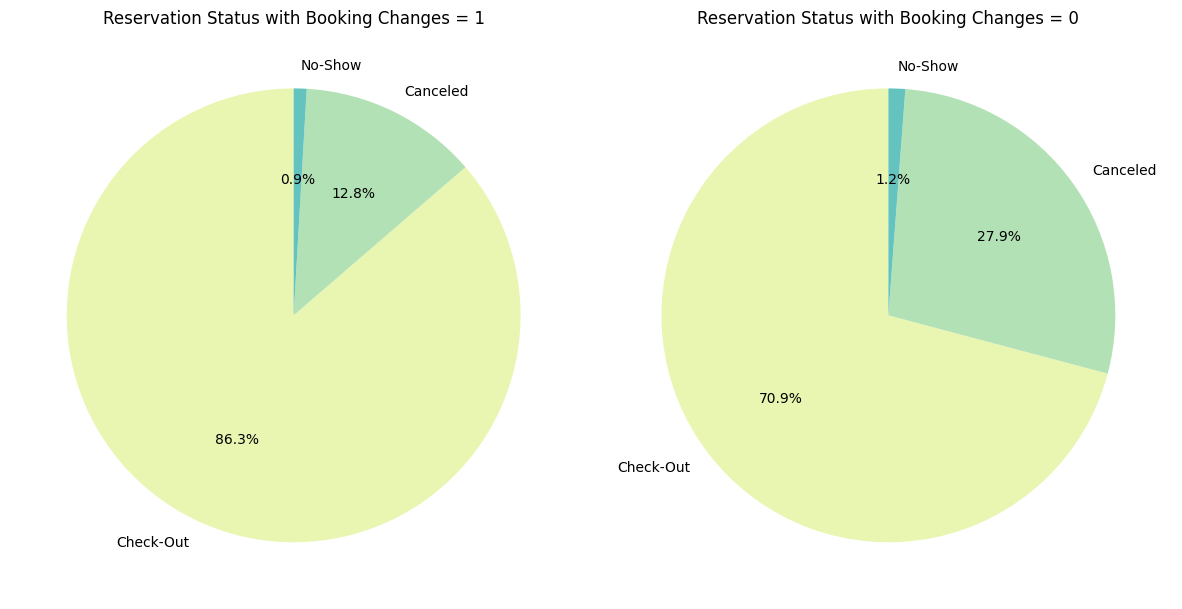

In [28]:
# Filter rows where 'booking_changes' is 1 or 0
booking_changes1 = hotel_data[hotel_data['booking_changes'] == 1]
booking_changes0 = hotel_data[hotel_data['booking_changes'] == 0]

# Calculate percentage total for each 'reservation_status' in each group
total_1 = len(booking_changes1)
total_0 = len(booking_changes0)

reservation_status_counts_1 = booking_changes1['reservation_status'].value_counts() / total_1 * 100
reservation_status_counts_0 = booking_changes0['reservation_status'].value_counts() / total_0 * 100

# Create two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Pie chart for 'Booking Changes = 1'
ax1.pie(reservation_status_counts_1, labels=reservation_status_counts_1.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
ax1.set_title('Reservation Status with Booking Changes = 1')

# Pie chart for 'Booking Changes = 0'
ax2.pie(reservation_status_counts_0, labels=reservation_status_counts_0.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
ax2.set_title('Reservation Status with Booking Changes = 0')

plt.tight_layout()
plt.show()

The analysis of booking changes indicates that there is a reduced percentage of cancellations (12.8%) when customers make adjustments to their reservations. Conversely, when no changes are made, cancellations occur at a higher rate (28%). This implies that the flexibility to modify bookings may reduce cancellations as guests can adapt their plans as needed.

### ix) Are Guests with Babies More Prone to Cancellations

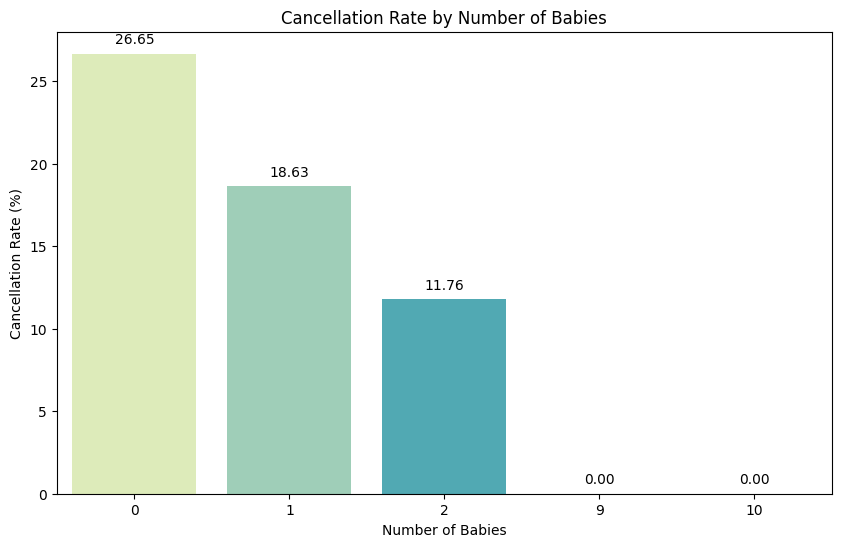

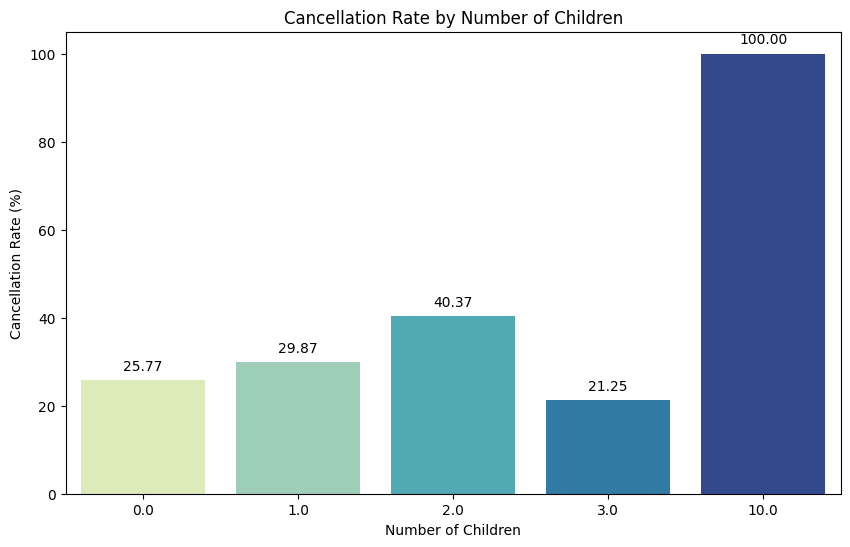

In [29]:
# Calculate the cancellation rate for each values in 'babies'
cancellation_rate_babies = hotel_data.groupby('babies')['is_canceled'].mean() * 100

# Create a bar chart with the 'YlGnBu' color palette and data labels
plt.figure(figsize=(10,6))
ax = sns.barplot(x=cancellation_rate_babies.index, y=cancellation_rate_babies, palette='YlGnBu')

plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Number of Babies')
plt.title('Cancellation Rate by Number of Babies')
plt.xticks(rotation=0)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
               textcoords='offset points')

plt.show()

# Calculate the cancellation rate for each value in 'children'
cancellation_rate_children = hotel_data.groupby('children')['is_canceled'].mean() * 100

# Create a bar chart with the 'YlGnBu' color palette and data labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cancellation_rate_children.index, y=cancellation_rate_children, palette='YlGnBu')

plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Number of Children')
plt.title('Cancellation Rate by Number of Children')
plt.xticks(rotation=0)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

The presence of babies in bookings doesn’t significantly influence cancellations, with the highest cancellation rate observed for bookings with zero babies. However, a notable pattern emerges for bookings with two children, where the cancellation rate is approximately 40%. It’s essential to recognize that while there’s a 100% cancellation rate for bookings with ten children, this data point is infrequent and doesn’t warrant significant emphasis.

## Predictive Modelling

We will build a predictive model aimed at identifying the most significant factors impacting hotel booking cancellations based on the most influential factors identified in the granular analysis. We will check if it matches our analysis in EDA.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select columns of interest
selected_columns = ['lead_time', 'arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'is_canceled']

# Create a subset of the data with the selected columns
subset_data = hotel_data[selected_columns]

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']

for col in categorical_columns:
    subset_data.loc[:, col] = label_encoder.fit_transform(subset_data[col])

# Split the data into features(X) and target variable (y)
X = subset_data.drop(columns='is_canceled')
y = subset_data['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     14809
           1       0.61      0.52      0.56      5330

    accuracy                           0.78     20139
   macro avg       0.72      0.70      0.71     20139
weighted avg       0.77      0.78      0.78     20139

Accuracy: 0.7833556780376384


### Feature Importance

In [32]:
# Get Feature Importances
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_feature_importance = dict(sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True))

print('\nFeature Importance (Top 10):')
for feature, importance in list(sorted_feature_importance.items())[:10]:
    print(f"{feature}: {importance:.4f}")


Feature Importance (Top 10):
lead_time: 0.5270
country: 0.1895
arrival_date_month: 0.0959
market_segment: 0.0690
reserved_room_type: 0.0468
customer_type: 0.0305
deposit_type: 0.0267
distribution_channel: 0.0145


## Results

**Lead Time (52.70%):** This feature holds the highest importance in predicting cancellations. It suggests that the amount of time between booking and the actual stay date plays a significant role. Guests who book well in advance might have different cancellation behaviors compared to last-minute bookers.

**Country (18.95%):** The origin of the guests, represented by the country variable, is the second most influential factor. Different countries might exhibit distinct booking and cancellation patterns.

**Arrival Date Month (9.59%):** The month of the year when guests arrive is also a critical feature. Seasonal variations and events might impact cancellation rates.

**Market Segment (6.90%):** The market segment from which the booking originates holds substantial importance. Different segments (e.g., corporate, groups, and individual travelers) may have varying cancellation tendencies.

**Reserved Room Type (4.68%):** The type of room reserved is a key factor. Guests booking specific room types may be more or less likely to cancel.

**Customer Type (3.05%):** The customer type (e.g., transient, group, etc.) is a valuable feature. Different customer segments may exhibit different cancellation behavior.

**Deposit Type (2.67%):** The type of deposit made during booking is also a significant predictor.

**Distribution Channel (1.45%):** Cancellations are also influenced by the channel used to make the reservation (e.g., direct reservations, online travel agencies).